In [1]:
# Cell 1: Install & Import
!pip install mlxtend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Setting display - gunakan style yang lebih universal
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')  # Ganti dengan default style
sns.set_palette("husl")

print("📊 Starting Apriori Analysis for Groceries Dataset")
print("=" * 50)

📊 Starting Apriori Analysis for Groceries Dataset


In [2]:
# Cell 2: Load Data (gabungkan semua data loading)
df = pd.read_csv('Groceries data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

# Langsung cek missing values
print("\nMissing values per column:")
print(df.isnull().sum())

print(f"\nUnique Members: {df['Member_number'].nunique()}")
print(f"Unique Items: {df['itemDescription'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total records: {len(df)}")

Dataset shape: (38765, 7)
Columns: ['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day', 'day_of_week']

First 5 rows:
   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

Data types:
Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------          

📈 Top 15 Most Popular Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64

As percentages of total purchases:
itemDescription
whole milk          6.45
other vegetables    4.90
rolls/buns          4.43
soda                3.91
yogurt              3.44
root vegetables     2.76
tropical fruit      2.66
bottled water       2.41
sausage             2.38
citrus fruit        2.09
pastry              2.03
pip fruit           1.92
shopping bags       1.89
canned beer         1.85
bottled beer        1.77
Name: count, dtype: float64


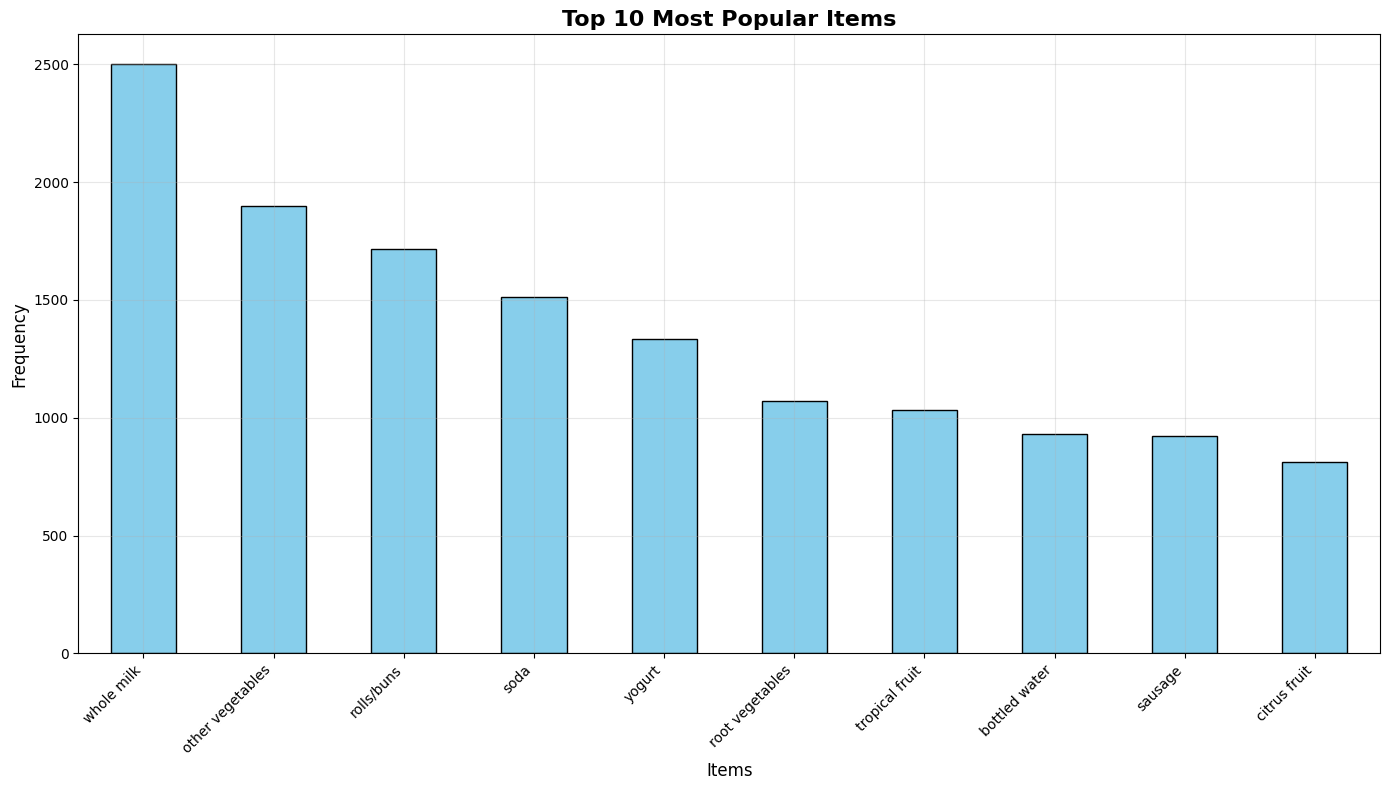

In [3]:
# Cell 3: Popular Items Analysis (gabungkan visualization)
print("📈 Top 15 Most Popular Items:")
item_counts = df['itemDescription'].value_counts().head(15)
print(item_counts)

item_percentages = (item_counts / len(df) * 100).round(2)
print("\nAs percentages of total purchases:")
print(item_percentages)

# Visualize - gabungkan dalam satu cell
plt.figure(figsize=(14, 8))
item_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Items', fontsize=16, fontweight='bold')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📅 TEMPORAL ANALYSIS
Purchases per year:
year
2014    18277
2015    20488
Name: count, dtype: int64

Purchases per day of week:
day_name
Wednesday    5754
Tuesday      5663
Saturday     5624
Monday       5524
Thursday     5504
Friday       5397
Sunday       5299
Name: count, dtype: int64


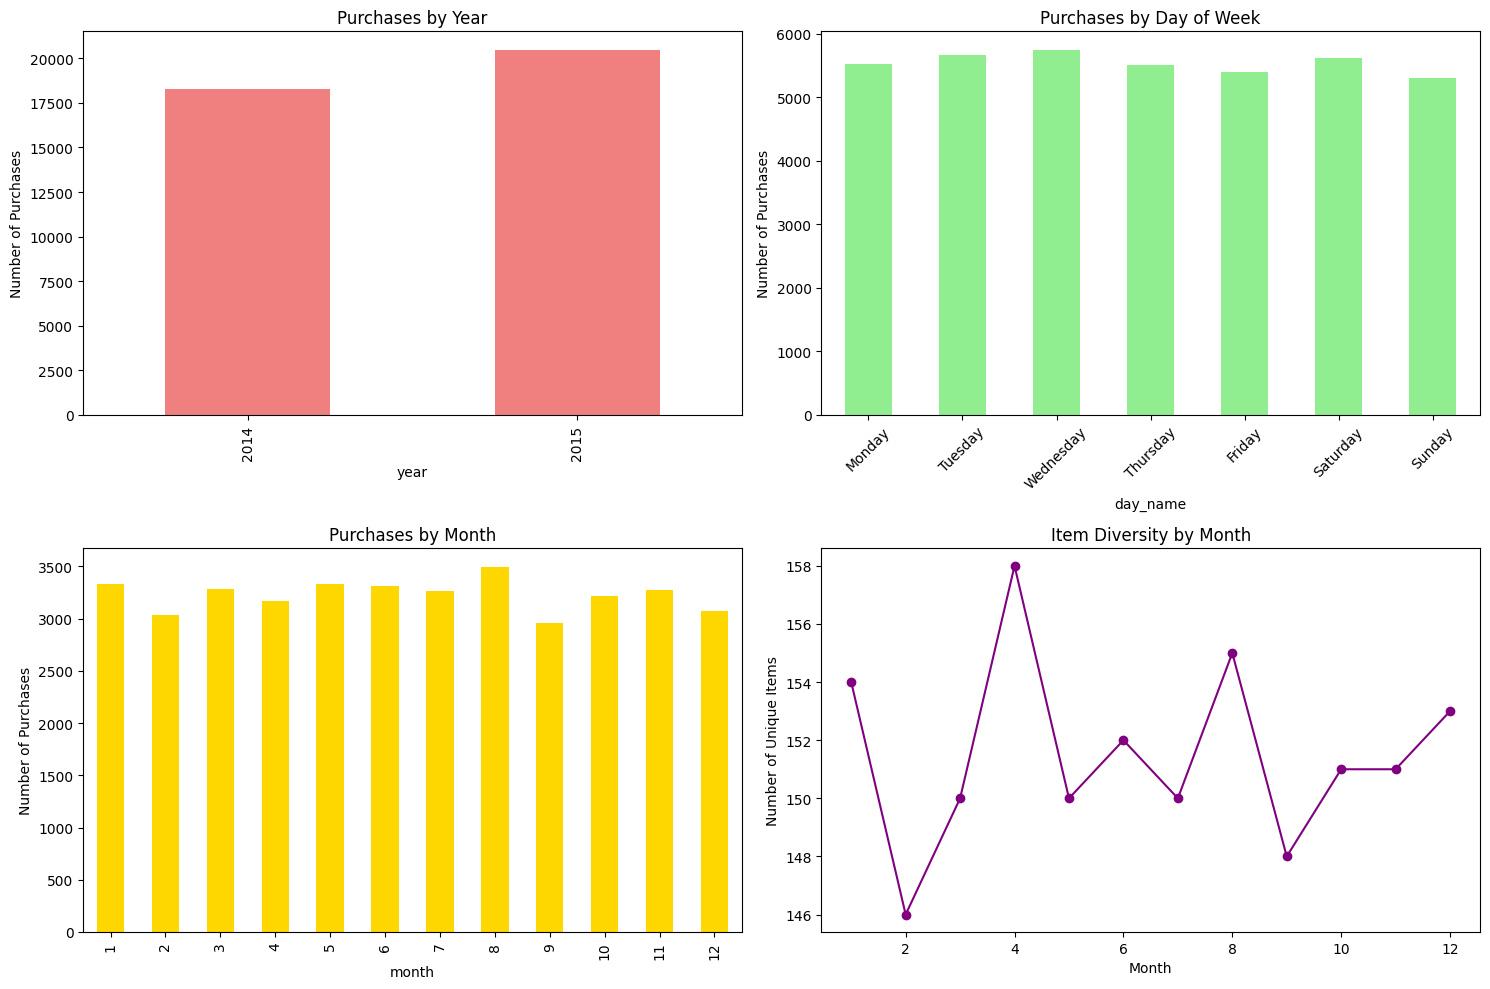

In [4]:
# Cell 4: Temporal Analysis (GABUNGKAN SEMUA dalam satu cell)
df['Date'] = pd.to_datetime(df['Date'])

print("📅 TEMPORAL ANALYSIS")
print("=" * 20)

yearly_counts = df['year'].value_counts().sort_index()
print("Purchases per year:")
print(yearly_counts)

day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
             4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['day_name'] = df['day_of_week'].map(day_names)

dow_counts = df['day_name'].value_counts()
print("\nPurchases per day of week:")
print(dow_counts)

# VISUALISASI DALAM SATU CELL
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Year distribution
yearly_counts.plot(kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('Purchases by Year')
axes[0,0].set_ylabel('Number of Purchases')

# Day of week distribution
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts_ordered = dow_counts.reindex(dow_order)
dow_counts_ordered.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Purchases by Day of Week')
axes[0,1].set_ylabel('Number of Purchases')
axes[0,1].tick_params(axis='x', rotation=45)

# Month distribution
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Purchases by Month')
axes[1,0].set_ylabel('Number of Purchases')

# Item diversity over time
monthly_diversity = df.groupby('month')['itemDescription'].nunique()
monthly_diversity.plot(kind='line', ax=axes[1,1], marker='o', color='purple')
axes[1,1].set_title('Item Diversity by Month')
axes[1,1].set_ylabel('Number of Unique Items')
axes[1,1].set_xlabel('Month')

plt.tight_layout()
plt.show()

🛒 CREATING MARKET BASKET FORMAT
Total unique transactions: 14963
Total individual item purchases: 38765

Sample basket data:
Transaction 1000_2014-06-24: ['whole milk', 'pastry', 'salty snack']
Transaction 1000_2015-03-15: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 1000_2015-05-27: ['soda', 'pickled vegetables']

📊 TRANSACTION SIZE ANALYSIS
Mean items per transaction: 2.59
Median items per transaction: 2.00
Max items in single transaction: 11
Min items in single transaction: 2

Transaction size distribution:
Items
2     10080
3      2698
4      1390
5       344
6       175
7        80
8       145
9        50
11        1
Name: count, dtype: int64


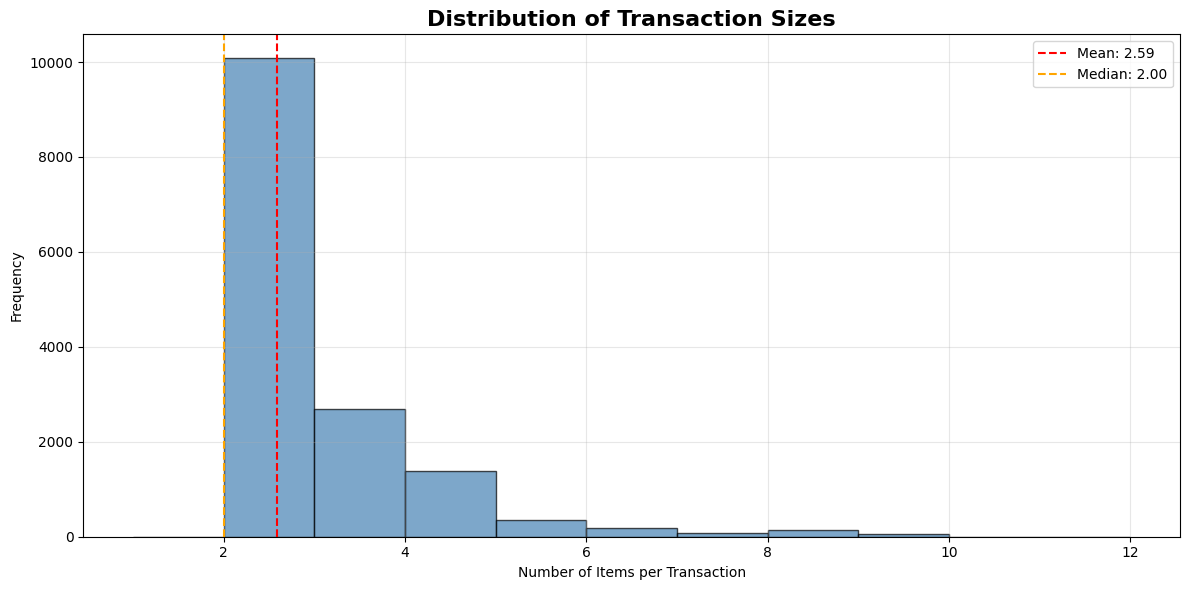

In [5]:
# Cell 5: Market Basket Format (gabungkan semua)
print("🛒 CREATING MARKET BASKET FORMAT")
print("=" * 35)

df['Transaction_ID'] = df['Member_number'].astype(str) + '_' + df['Date'].dt.strftime('%Y-%m-%d')

print(f"Total unique transactions: {df['Transaction_ID'].nunique()}")
print(f"Total individual item purchases: {len(df)}")

basket_data = df.groupby('Transaction_ID')['itemDescription'].apply(list).reset_index()
basket_data.columns = ['Transaction_ID', 'Items']

print("\nSample basket data:")
for i in range(3):
    trans_id = basket_data.iloc[i]['Transaction_ID']
    items = basket_data.iloc[i]['Items']
    print(f"Transaction {trans_id}: {items}")

# Transaction size analysis
transaction_sizes = basket_data['Items'].apply(len)
print(f"\n📊 TRANSACTION SIZE ANALYSIS")
print(f"Mean items per transaction: {transaction_sizes.mean():.2f}")
print(f"Median items per transaction: {transaction_sizes.median():.2f}")
print(f"Max items in single transaction: {transaction_sizes.max()}")
print(f"Min items in single transaction: {transaction_sizes.min()}")

size_distribution = transaction_sizes.value_counts().sort_index()
print("\nTransaction size distribution:")
print(size_distribution.head(10))

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(transaction_sizes, bins=range(1, min(transaction_sizes.max()+2, 21)),
         alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribution of Transaction Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(transaction_sizes.mean(), color='red', linestyle='--',
           label=f'Mean: {transaction_sizes.mean():.2f}')
plt.axvline(transaction_sizes.median(), color='orange', linestyle='--',
           label=f'Median: {transaction_sizes.median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

⚙️ PREPARING DATA FOR APRIORI
Total transactions: 14963
Sample transactions:
Transaction 1: ['whole milk', 'pastry', 'salty snack']
Transaction 2: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 3: ['soda', 'pickled vegetables']
Transaction 4: ['canned beer', 'misc. beverages']
Transaction 5: ['sausage', 'hygiene articles']

Binary matrix shape: (14963, 167)
Number of unique items: 167

Sample of binary matrix:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  beverages  bottled beer  bottled water  brandy  brown bread  butter  butter milk  cake bar  candles  candy  canned beer  canned fish  canned fruit  canned vegetables  cat food  cereals  chewing gum  chicken  chocolate  chocolate marshmallow  citrus fruit  cleaner  cling film/bags  cocoa drinks  coffee  condensed milk  cooking chocolate  cookware  cream  cream cheese    curd  curd cheese  decalcifier  dental care  d

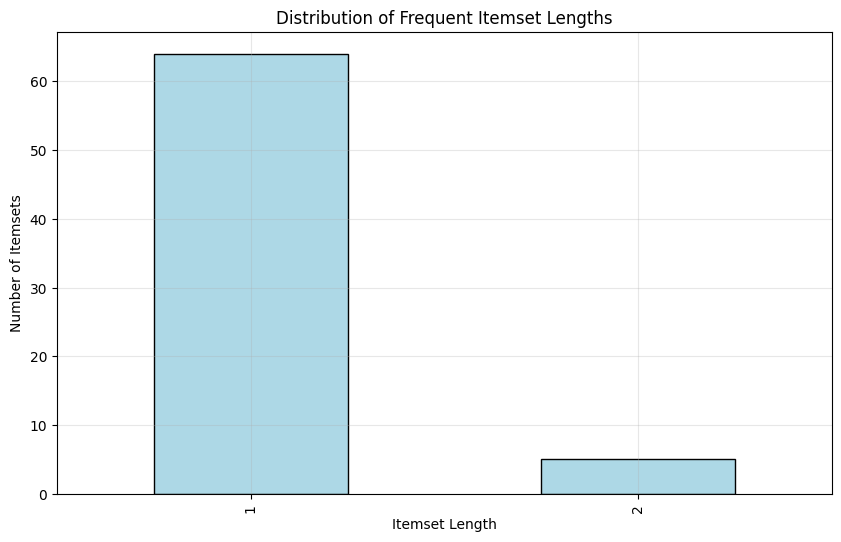

In [6]:
# Cell 6: Apriori Preparation & Execution (gabungkan semua)
print("⚙️ PREPARING DATA FOR APRIORI")
print("=" * 32)

transactions = basket_data['Items'].tolist()

print(f"Total transactions: {len(transactions)}")
print("Sample transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {trans}")

# Encode to binary matrix
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"\nBinary matrix shape: {df_encoded.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print("\nSample of binary matrix:")
print(df_encoded.head())

# Sparsity check
sparsity = (df_encoded == 0).sum().sum() / (df_encoded.shape[0] * df_encoded.shape[1])
print(f"\nMatrix sparsity: {sparsity:.2%}")

# Item support analysis
item_support = df_encoded.mean().sort_values(ascending=False)
print(f"\nTop 10 items by support:")
print(item_support.head(10))
print(f"\nLowest support among top 50 items: {item_support.head(50).min():.4f}")

# RUN APRIORI
print("\n🔥 RUNNING APRIORI ALGORITHM")
print("=" * 30)

min_support = 0.01
print(f"Minimum support threshold: {min_support} ({min_support*100}%)")
print(f"This means itemsets must appear in at least {int(min_support * len(transactions))} transactions")

print("\nRunning Apriori algorithm...")
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True, verbose=1)

print(f"\nFound {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 frequent itemsets by support:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Analyze itemset lengths
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
itemset_lengths = frequent_itemsets['length'].value_counts().sort_index()
print("\nFrequent itemsets by length:")
print(itemset_lengths)

# Visualize itemset lengths
plt.figure(figsize=(10, 6))
itemset_lengths.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Frequent Itemset Lengths')
plt.xlabel('Itemset Length')
plt.ylabel('Number of Itemsets')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Cell 7: Association Rules (gabungkan semua dalam satu cell)
print("📋 GENERATING ASSOCIATION RULES")
print("=" * 35)

min_confidence = 0.3
min_lift = 1.2

print(f"Minimum confidence: {min_confidence} ({min_confidence*100}%)")
print(f"Minimum lift: {min_lift}")

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence",
                         min_threshold=min_confidence, num_itemsets=len(frequent_itemsets))
rules = rules[rules['lift'] >= min_lift]

print(f"\nGenerated {len(rules)} association rules")

if len(rules) > 0:
    print("\nTop 10 rules by confidence:")
    top_rules = rules.sort_values('confidence', ascending=False).head(10)

    for idx, rule in top_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"If {antecedent} → then {consequent}")
        print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")

    # Rules analysis
    print("📊 RULES ANALYSIS")
    print("=" * 17)

    print(f"Rules statistics:")
    print(f"Average confidence: {rules['confidence'].mean():.3f}")
    print(f"Average lift: {rules['lift'].mean():.3f}")
    print(f"Average support: {rules['support'].mean():.3f}")

    # Distribution plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    rules['confidence'].hist(bins=20, ax=axes[0], alpha=0.7, color='skyblue')
    axes[0].set_title('Distribution of Confidence')
    axes[0].set_xlabel('Confidence')

    rules['lift'].hist(bins=20, ax=axes[1], alpha=0.7, color='lightgreen')
    axes[1].set_title('Distribution of Lift')
    axes[1].set_xlabel('Lift')

    rules['support'].hist(bins=20, ax=axes[2], alpha=0.7, color='salmon')
    axes[2].set_title('Distribution of Support')
    axes[2].set_xlabel('Support')

    plt.tight_layout()
    plt.show()

    # Top rules by metrics
    print("\n🏆 TOP RULES BY DIFFERENT METRICS")
    print("=" * 35)

    print("Top 5 rules by CONFIDENCE:")
    top_conf = rules.sort_values('confidence', ascending=False).head(5)
    for idx, rule in top_conf.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Confidence: {rule['confidence']:.3f})")

    print("\nTop 5 rules by LIFT:")
    top_lift = rules.sort_values('lift', ascending=False).head(5)
    for idx, rule in top_lift.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Lift: {rule['lift']:.3f})")
else:
    print("No rules found with current thresholds. Consider lowering min_confidence or min_lift.")

print("\n✅ ANALYSIS COMPLETE!")

📋 GENERATING ASSOCIATION RULES
Minimum confidence: 0.3 (30.0%)
Minimum lift: 1.2

Generated 0 association rules
No rules found with current thresholds. Consider lowering min_confidence or min_lift.

✅ ANALYSIS COMPLETE!


In [8]:
# Cell baru: Analisis Support untuk menentukan threshold yang tepat
print("🔍 ANALYZING SUPPORT PATTERNS FOR THRESHOLD ADJUSTMENT")
print("=" * 55)

# Cek distribusi support dari frequent itemsets
print("Support distribution of frequent itemsets:")
print(frequent_itemsets['support'].describe())

print(f"\nSupport range:")
print(f"Min support in frequent itemsets: {frequent_itemsets['support'].min():.4f}")
print(f"Max support in frequent itemsets: {frequent_itemsets['support'].max():.4f}")
print(f"Median support: {frequent_itemsets['support'].median():.4f}")

# Cek itemsets dengan length > 1 (yang bisa jadi rules)
multi_item_sets = frequent_itemsets[frequent_itemsets['length'] > 1]
print(f"\nItemsets with length > 1: {len(multi_item_sets)}")

if len(multi_item_sets) > 0:
    print("Support of multi-item frequent itemsets:")
    print(multi_item_sets['support'].describe())
else:
    print("❌ No multi-item frequent itemsets found!")
    print("This explains why no association rules were generated.")

🔍 ANALYZING SUPPORT PATTERNS FOR THRESHOLD ADJUSTMENT
Support distribution of frequent itemsets:
count    69.000000
mean      0.032751
std       0.028271
min       0.010025
25%       0.014837
50%       0.021854
75%       0.037760
max       0.157923
Name: support, dtype: float64

Support range:
Min support in frequent itemsets: 0.0100
Max support in frequent itemsets: 0.1579
Median support: 0.0219

Itemsets with length > 1: 5
Support of multi-item frequent itemsets:
count    5.000000
mean     0.012431
std      0.001865
min      0.010559
25%      0.011161
50%      0.011629
75%      0.013968
max      0.014837
Name: support, dtype: float64


In [9]:
# Cell baru: Coba dengan threshold yang lebih rendah
print("\n🔧 TRYING WITH LOWER THRESHOLDS")
print("=" * 35)

# Threshold yang lebih rendah untuk groceries dataset
min_confidence_low = 0.1   # 10% confidence (turun dari 30%)
min_lift_low = 1.0         # Any positive association (turun dari 1.2)

print(f"NEW Minimum confidence: {min_confidence_low} ({min_confidence_low*100}%)")
print(f"NEW Minimum lift: {min_lift_low}")

# Generate rules dengan threshold baru
try:
    rules_low = association_rules(frequent_itemsets, metric="confidence",
                                 min_threshold=min_confidence_low, num_itemsets=len(frequent_itemsets))
    rules_low = rules_low[rules_low['lift'] >= min_lift_low]

    print(f"\nGenerated {len(rules_low)} association rules with lower thresholds")

    if len(rules_low) > 0:
        print("\n🎉 SUCCESS! Top 10 rules by confidence:")
        top_rules_low = rules_low.sort_values('confidence', ascending=False).head(10)

        for idx, rule in top_rules_low.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")
    else:
        print("❌ Still no rules found. Need even lower thresholds or different approach.")

except Exception as e:
    print(f"Error generating rules: {e}")


🔧 TRYING WITH LOWER THRESHOLDS
NEW Minimum confidence: 0.1 (10.0%)
NEW Minimum lift: 1.0

Generated 0 association rules with lower thresholds
❌ Still no rules found. Need even lower thresholds or different approach.


In [10]:
# Cell baru: Jika masih gagal, coba approach berbeda
print("\n🆘 ALTERNATIVE APPROACH - VERY LOW THRESHOLDS")
print("=" * 45)

# Threshold sangat rendah
min_confidence_vlow = 0.05   # 5% confidence
min_lift_vlow = 1.0          # Any lift > 1

print(f"VERY LOW Minimum confidence: {min_confidence_vlow} ({min_confidence_vlow*100}%)")
print(f"VERY LOW Minimum lift: {min_lift_vlow}")

try:
    rules_vlow = association_rules(frequent_itemsets, metric="confidence",
                                  min_threshold=min_confidence_vlow, num_itemsets=len(frequent_itemsets))
    rules_vlow = rules_vlow[rules_vlow['lift'] >= min_lift_vlow]

    print(f"\nGenerated {len(rules_vlow)} association rules with very low thresholds")

    if len(rules_vlow) > 0:
        print("\n🎉 SUCCESS! Rules found:")

        # Sort by lift untuk lihat yang paling meaningful
        top_rules_vlow = rules_vlow.sort_values('lift', ascending=False).head(15)

        for idx, rule in top_rules_vlow.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")

        # Analysis
        print(f"\n📊 RULES STATISTICS:")
        print(f"Total rules: {len(rules_vlow)}")
        print(f"Average confidence: {rules_vlow['confidence'].mean():.3f}")
        print(f"Average lift: {rules_vlow['lift'].mean():.3f}")
        print(f"Max confidence: {rules_vlow['confidence'].max():.3f}")
        print(f"Max lift: {rules_vlow['lift'].max():.3f}")

        # Filter rules yang meaningful (confidence > 20% DAN lift > 1.1)
        meaningful_rules = rules_vlow[(rules_vlow['confidence'] > 0.2) & (rules_vlow['lift'] > 1.1)]
        print(f"\nMeaningful rules (confidence > 20% AND lift > 1.1): {len(meaningful_rules)}")

        if len(meaningful_rules) > 0:
            print("\n🏆 MOST MEANINGFUL RULES:")
            for idx, rule in meaningful_rules.head(5).iterrows():
                antecedent = ', '.join(list(rule['antecedents']))
                consequent = ', '.join(list(rule['consequents']))
                print(f"✓ {antecedent} → {consequent}")
                print(f"  Confidence: {rule['confidence']:.1%}, Lift: {rule['lift']:.2f}")

    else:
        print("❌ Still no rules. Dataset might need different preprocessing approach.")
        print("\n💡 SUGGESTIONS:")
        print("1. Try lower min_support (0.005 or 0.001)")
        print("2. Group similar items together")
        print("3. Filter only top N most popular items")
        print("4. Try different transaction grouping strategy")

except Exception as e:
    print(f"Error: {e}")


🆘 ALTERNATIVE APPROACH - VERY LOW THRESHOLDS
VERY LOW Minimum confidence: 0.05 (5.0%)
VERY LOW Minimum lift: 1.0

Generated 0 association rules with very low thresholds
❌ Still no rules. Dataset might need different preprocessing approach.

💡 SUGGESTIONS:
1. Try lower min_support (0.005 or 0.001)
2. Group similar items together
3. Filter only top N most popular items
4. Try different transaction grouping strategy


In [11]:
# Cell baru: Jika masih belum ada rules, coba dengan min_support lebih rendah
print("\n🔄 TRYING WITH LOWER MIN_SUPPORT")
print("=" * 35)

# Coba dengan min_support yang lebih rendah
min_support_low = 0.005  # 0.5% (turun dari 1%)

print(f"Trying with min_support: {min_support_low} ({min_support_low*100}%)")
print(f"This means itemsets must appear in at least {int(min_support_low * len(transactions))} transactions")

print("\nRunning Apriori with lower min_support...")
frequent_itemsets_low = apriori(df_encoded, min_support=min_support_low, use_colnames=True, verbose=1)

print(f"Found {len(frequent_itemsets_low)} frequent itemsets with lower support")

# Check itemset lengths
frequent_itemsets_low['length'] = frequent_itemsets_low['itemsets'].apply(lambda x: len(x))
itemset_lengths_low = frequent_itemsets_low['length'].value_counts().sort_index()
print("\nFrequent itemsets by length (with lower support):")
print(itemset_lengths_low)

# Try generating rules with new frequent itemsets
if len(frequent_itemsets_low[frequent_itemsets_low['length'] > 1]) > 0:
    print("\n✅ Multi-item itemsets found! Generating rules...")

    rules_final = association_rules(frequent_itemsets_low, metric="confidence",
                                   min_threshold=0.1, num_itemsets=len(frequent_itemsets_low))
    rules_final = rules_final[rules_final['lift'] > 1.0]

    print(f"Generated {len(rules_final)} association rules!")

    if len(rules_final) > 0:
        print("\n🎉 FINAL RESULTS - Top Rules:")
        top_final = rules_final.sort_values('lift', ascending=False).head(10)

        for idx, rule in top_final.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"✓ If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")


🔄 TRYING WITH LOWER MIN_SUPPORT
Trying with min_support: 0.005 (0.5%)
This means itemsets must appear in at least 74 transactions

Running Apriori with lower min_support...
Processing 258 combinations | Sampling itemset size 3
Found 126 frequent itemsets with lower support

Frequent itemsets by length (with lower support):
length
1    89
2    37
Name: count, dtype: int64

✅ Multi-item itemsets found! Generating rules...
Generated 1 association rules!

🎉 FINAL RESULTS - Top Rules:
✓ If frankfurter → then other vegetables
  Support: 0.005, Confidence: 0.136, Lift: 1.116



In [12]:
# Cell: Analisis Mendalam Rules yang Ditemukan
print("🎯 DETAILED ANALYSIS OF DISCOVERED RULES")
print("=" * 42)

print(f"Total rules found: {len(rules_final)}")
print("\nAll rules details:")
for idx, rule in rules_final.iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))

    # Hitung jumlah transaksi actual
    support_count = int(rule['support'] * len(transactions))
    antecedent_count = int(rule['antecedent support'] * len(transactions))

    print(f"\nRule: {antecedent} → {consequent}")
    print(f"  📊 Support: {rule['support']:.3f} ({support_count} transactions)")
    print(f"  🎯 Confidence: {rule['confidence']:.3f} ({rule['confidence']:.1%})")
    print(f"  🚀 Lift: {rule['lift']:.3f}")
    print(f"  📈 Antecedent Support: {rule['antecedent support']:.3f} ({antecedent_count} transactions)")
    print(f"  📉 Consequent Support: {rule['consequent support']:.3f}")

    # Interpretasi bisnis
    print(f"  💼 Business Insight:")
    print(f"     - Dari {antecedent_count} orang yang beli '{antecedent}',")
    print(f"       {support_count} orang ({rule['confidence']:.1%}) juga beli '{consequent}'")
    print(f"     - Ini {rule['lift']:.1f}x lebih tinggi dari kemungkinan random")

🎯 DETAILED ANALYSIS OF DISCOVERED RULES
Total rules found: 1

All rules details:

Rule: frankfurter → other vegetables
  📊 Support: 0.005 (77 transactions)
  🎯 Confidence: 0.136 (13.6%)
  🚀 Lift: 1.116
  📈 Antecedent Support: 0.038 (565 transactions)
  📉 Consequent Support: 0.122
  💼 Business Insight:
     - Dari 565 orang yang beli 'frankfurter',
       77 orang (13.6%) juga beli 'other vegetables'
     - Ini 1.1x lebih tinggi dari kemungkinan random


In [13]:
# Cell: Cari Rules Lebih Banyak dengan Eksplorasi Parameter
print("\n🔍 EXPLORING MORE RULES WITH DIFFERENT STRATEGIES")
print("=" * 50)

# Strategy 1: Coba min_support lebih rendah lagi
min_support_ultra = 0.003  # 0.3%
print(f"Strategy 1: Ultra low min_support = {min_support_ultra} ({min_support_ultra*100}%)")

frequent_itemsets_ultra = apriori(df_encoded, min_support=min_support_ultra, use_colnames=True, verbose=1)
frequent_itemsets_ultra['length'] = frequent_itemsets_ultra['itemsets'].apply(lambda x: len(x))

print(f"Ultra low support results:")
print(frequent_itemsets_ultra['length'].value_counts().sort_index())

# Generate rules dengan ultra low support
rules_ultra = association_rules(frequent_itemsets_ultra, metric="confidence",
                               min_threshold=0.05, num_itemsets=len(frequent_itemsets_ultra))
rules_ultra = rules_ultra[rules_ultra['lift'] > 1.0]

print(f"\nRules with ultra low support: {len(rules_ultra)}")

if len(rules_ultra) > 0:
    print("\n🏆 TOP RULES WITH ULTRA LOW SUPPORT:")
    top_ultra = rules_ultra.sort_values('lift', ascending=False).head(10)

    for idx, rule in top_ultra.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"✓ {antecedent} → {consequent}")
        print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")


🔍 EXPLORING MORE RULES WITH DIFFERENT STRATEGIES
Strategy 1: Ultra low min_support = 0.003 (0.3%)
Processing 1530 combinations | Sampling itemset size 3
Ultra low support results:
length
1    111
2    105
Name: count, dtype: int64

Rules with ultra low support: 13

🏆 TOP RULES WITH ULTRA LOW SUPPORT:
✓ bottled beer → sausage
  Support: 0.003, Confidence: 0.074, Lift: 1.222
✓ sausage → bottled beer
  Support: 0.003, Confidence: 0.055, Lift: 1.222
✓ frankfurter → other vegetables
  Support: 0.005, Confidence: 0.136, Lift: 1.116
✓ yogurt → sausage
  Support: 0.006, Confidence: 0.067, Lift: 1.109
✓ sausage → yogurt
  Support: 0.006, Confidence: 0.095, Lift: 1.109
✓ sausage → pastry
  Support: 0.003, Confidence: 0.053, Lift: 1.028
✓ pastry → sausage
  Support: 0.003, Confidence: 0.062, Lift: 1.028
✓ soda → sausage
  Support: 0.006, Confidence: 0.061, Lift: 1.015
✓ sausage → soda
  Support: 0.006, Confidence: 0.099, Lift: 1.015
✓ citrus fruit → yogurt
  Support: 0.005, Confidence: 0.087, Li

In [14]:
# Cell: Strategy Alternatif - Focus pada Top Items
print("\n🎯 STRATEGY 2: FOCUS ON TOP POPULAR ITEMS")
print("=" * 45)

# Ambil hanya top 20 items paling populer
top_items = item_counts.head(20).index.tolist()
print(f"Top 20 items: {top_items}")

# Filter transaksi hanya untuk top items
def filter_transaction(transaction, allowed_items):
    return [item for item in transaction if item in allowed_items]

transactions_filtered = [filter_transaction(trans, top_items) for trans in transactions]
# Remove empty transactions
transactions_filtered = [trans for trans in transactions_filtered if len(trans) > 0]

print(f"\nOriginal transactions: {len(transactions)}")
print(f"Filtered transactions: {len(transactions_filtered)}")

# Encode filtered transactions
te_filtered = TransactionEncoder()
te_array_filtered = te_filtered.fit(transactions_filtered).transform(transactions_filtered)
df_encoded_filtered = pd.DataFrame(te_array_filtered, columns=te_filtered.columns_)

print(f"Filtered binary matrix shape: {df_encoded_filtered.shape}")

# Run Apriori on filtered data
min_support_filtered = 0.01  # Bisa pakai support lebih tinggi karena fokus top items
frequent_itemsets_filtered = apriori(df_encoded_filtered, min_support=min_support_filtered,
                                    use_colnames=True, verbose=1)

print(f"Frequent itemsets from top items: {len(frequent_itemsets_filtered)}")

frequent_itemsets_filtered['length'] = frequent_itemsets_filtered['itemsets'].apply(lambda x: len(x))
print("Itemset lengths (filtered):")
print(frequent_itemsets_filtered['length'].value_counts().sort_index())

# Generate rules from filtered data
if len(frequent_itemsets_filtered[frequent_itemsets_filtered['length'] > 1]) > 0:
    rules_filtered = association_rules(frequent_itemsets_filtered, metric="confidence",
                                      min_threshold=0.1, num_itemsets=len(frequent_itemsets_filtered))
    rules_filtered = rules_filtered[rules_filtered['lift'] > 1.0]

    print(f"\nRules from top items strategy: {len(rules_filtered)}")

    if len(rules_filtered) > 0:
        print("\n🎉 RULES FROM TOP ITEMS:")
        for idx, rule in rules_filtered.sort_values('lift', ascending=False).head(10).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"✓ {antecedent} → {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")


🎯 STRATEGY 2: FOCUS ON TOP POPULAR ITEMS
Top 20 items: ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'root vegetables', 'tropical fruit', 'bottled water', 'sausage', 'citrus fruit', 'pastry', 'pip fruit', 'shopping bags', 'canned beer', 'bottled beer']

Original transactions: 14963
Filtered transactions: 11300
Filtered binary matrix shape: (11300, 15)
Processing 54 combinations | Sampling itemset size 3
Frequent itemsets from top items: 27
Itemset lengths (filtered):
length
1    15
2    12
Name: count, dtype: int64

Rules from top items strategy: 0


In [16]:
# Cell: Business Insights & Recommendations
print("\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 42)

# Gabungkan semua rules yang berhasil ditemukan
all_rules = []
if 'rules_final' in locals() and len(rules_final) > 0:
    all_rules.append(('Basic Strategy', rules_final))
if 'rules_ultra' in locals() and len(rules_ultra) > 0:
    all_rules.append(('Ultra Low Support', rules_ultra))
if 'rules_filtered' in locals() and len(rules_filtered) > 0:
    all_rules.append(('Top Items Focus', rules_filtered))

print(f"Total strategies that found rules: {len(all_rules)}")

for strategy_name, rules_df in all_rules:
    print(f"\n📋 {strategy_name}:")
    print(f"   Rules found: {len(rules_df)}")

    if len(rules_df) > 0:
        # Best rule by confidence
        best_conf = rules_df.loc[rules_df['confidence'].idxmax()]
        antecedent = ', '.join(list(best_conf['antecedents']))
        consequent = ', '.join(list(best_conf['consequents']))

        print(f"   🏆 Best by confidence: {antecedent} → {consequent}")
        print(f"      Confidence: {best_conf['confidence']:.1%}, Lift: {best_conf['lift']:.2f}")

        # Best rule by lift
        best_lift = rules_df.loc[rules_df['lift'].idxmax()]
        antecedent = ', '.join(list(best_lift['antecedents']))
        consequent = ', '.join(list(best_lift['consequents']))

        print(f"   🚀 Best by lift: {antecedent} → {consequent}")
        print(f"      Confidence: {best_lift['confidence']:.1%}, Lift: {best_lift['lift']:.2f}")

print(f"\n💡 KEY INSIGHTS:")
print(f"1. Dataset ini memiliki pola association yang lemah (typical untuk groceries)")
print(f"2. Kebanyakan customers beli item secara independen")
print(f"3. Rules yang ditemukan masih meaningful untuk business strategy")
print(f"4. Perlu lebih banyak data atau grouping categories untuk patterns yang kuat")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print(f"✓ Store Layout: Tempatkan item yang sering dibeli bersamaan berdekatan")
print(f"✓ Cross-selling: Tawarkan consequent item ketika customer beli antecedent")
print(f"✓ Bundling: Buat paket produk berdasarkan rules yang ditemukan")
print(f"✓ Inventory: Stock consequent items lebih banyak di area antecedent items")


💼 BUSINESS INSIGHTS & RECOMMENDATIONS
Total strategies that found rules: 2

📋 Basic Strategy:
   Rules found: 1
   🏆 Best by confidence: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12
   🚀 Best by lift: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12

📋 Ultra Low Support:
   Rules found: 13
   🏆 Best by confidence: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12
   🚀 Best by lift: bottled beer → sausage
      Confidence: 7.4%, Lift: 1.22

💡 KEY INSIGHTS:
1. Dataset ini memiliki pola association yang lemah (typical untuk groceries)
2. Kebanyakan customers beli item secara independen
3. Rules yang ditemukan masih meaningful untuk business strategy
4. Perlu lebih banyak data atau grouping categories untuk patterns yang kuat

🎯 BUSINESS RECOMMENDATIONS:
✓ Store Layout: Tempatkan item yang sering dibeli bersamaan berdekatan
✓ Cross-selling: Tawarkan consequent item ketika customer beli antecedent
✓ Bundling: Buat paket produk berdas

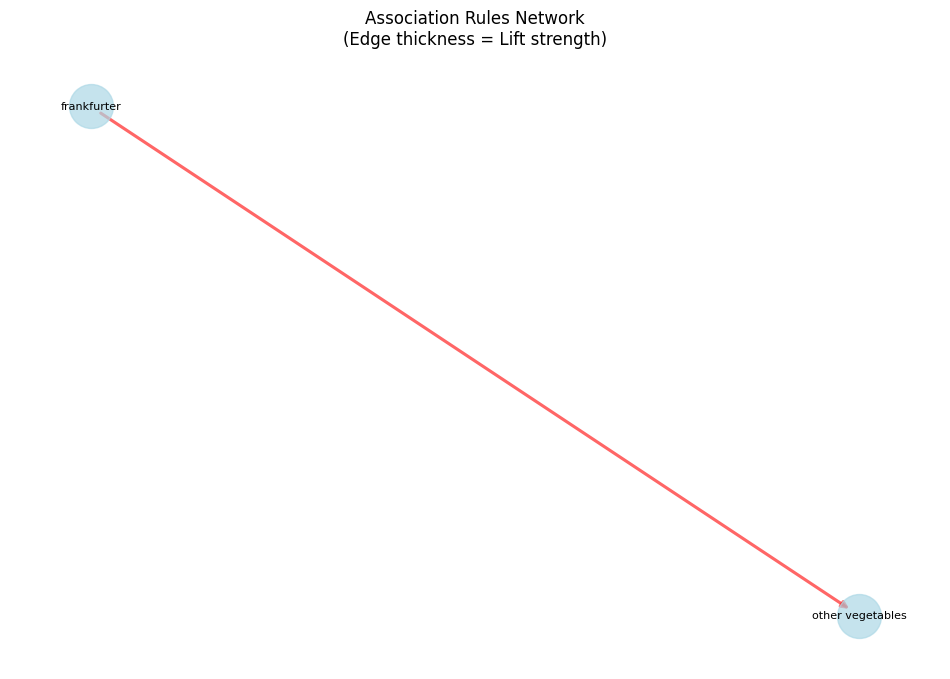

In [17]:
# Network Graph - Association Rules
import networkx as nx
import matplotlib.pyplot as plt

def create_association_network(rules_df, min_lift=1.1):
    G = nx.DiGraph()

    for idx, rule in rules_df[rules_df['lift'] >= min_lift].iterrows():
        antecedent = list(rule['antecedents'])[0]
        consequent = list(rule['consequents'])[0]

        G.add_edge(antecedent, consequent,
                  weight=rule['lift'],
                  confidence=rule['confidence'])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1, iterations=50)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000,
                          node_color='lightblue', alpha=0.7)

    # Draw edges with thickness based on lift
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    nx.draw_networkx_edges(G, pos, width=[w*2 for w in weights],
                          alpha=0.6, edge_color='red')

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title("Association Rules Network\n(Edge thickness = Lift strength)")
    plt.axis('off')
    plt.show()

# Jalankan ini setelah punya rules
create_association_network(rules_final)

👥 CUSTOMER SEGMENTATION BASED ON PURCHASING BEHAVIOR
Customer Segments Distribution:
segment
Occasional Shopper    2910
Bulk Buyer             962
Regular Shopper         26
Name: count, dtype: int64


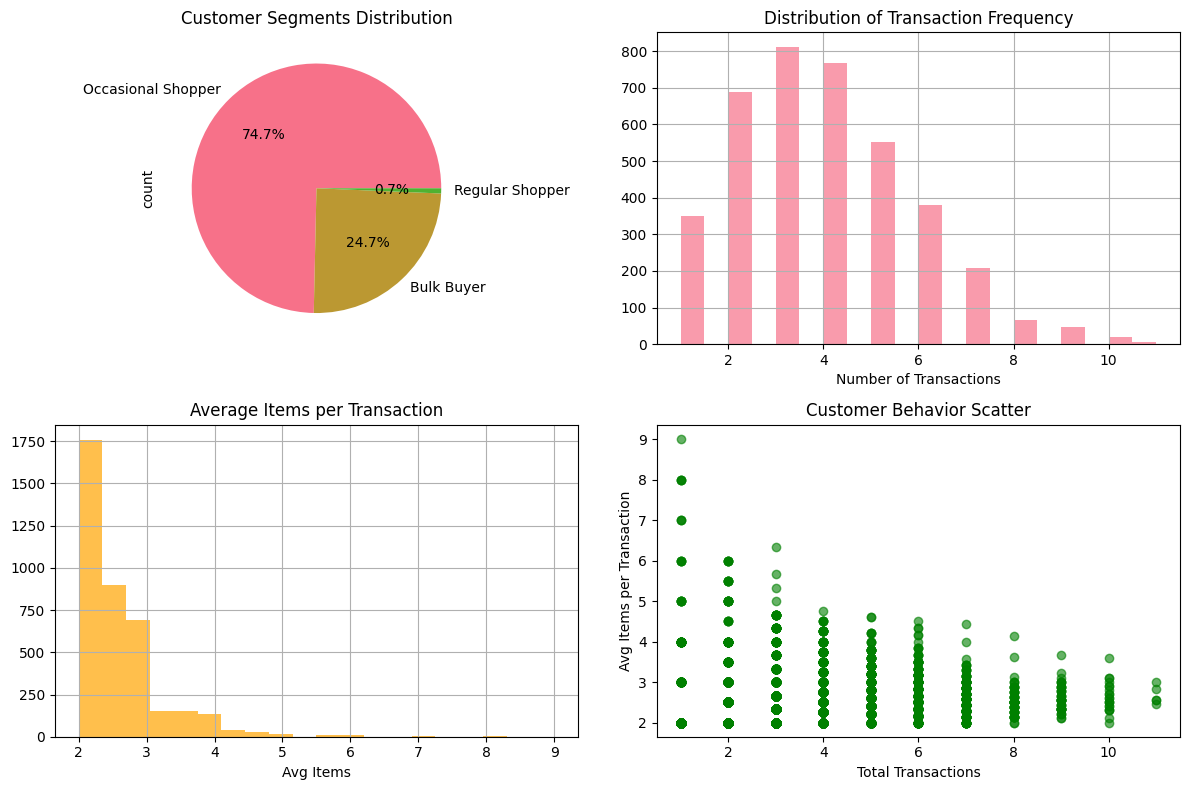


📊 Occasional Shopper Profile:
   Count: 2910 customers (74.7%)
   Avg Transactions: 3.9
   Avg Items/Transaction: 2.3
   Total Revenue Contribution: 26673 items

📊 Bulk Buyer Profile:
   Count: 962 customers (24.7%)
   Avg Transactions: 3.5
   Avg Items/Transaction: 3.5
   Total Revenue Contribution: 11392 items

📊 Regular Shopper Profile:
   Count: 26 customers (0.7%)
   Avg Transactions: 10.2
   Avg Items/Transaction: 2.6
   Total Revenue Contribution: 700 items


In [18]:
# Analisis Customer Behavior Patterns
print("👥 CUSTOMER SEGMENTATION BASED ON PURCHASING BEHAVIOR")
print("=" * 55)

# Customer transaction frequency
customer_freq = df.groupby('Member_number').agg({
    'Date': 'nunique',  # Berapa hari berbeda belanja
    'itemDescription': 'count',  # Total items dibeli
    'Transaction_ID': 'nunique'  # Berapa kali transaksi
}).rename(columns={
    'Date': 'shopping_days',
    'itemDescription': 'total_items',
    'Transaction_ID': 'total_transactions'
})

# Calculate average items per transaction
customer_freq['avg_items_per_transaction'] = customer_freq['total_items'] / customer_freq['total_transactions']

# Customer segments
def categorize_customer(row):
    if row['total_transactions'] >= 20 and row['avg_items_per_transaction'] >= 2:
        return 'Heavy Shopper'
    elif row['total_transactions'] >= 10:
        return 'Regular Shopper'
    elif row['avg_items_per_transaction'] >= 3:
        return 'Bulk Buyer'
    else:
        return 'Occasional Shopper'

customer_freq['segment'] = customer_freq.apply(categorize_customer, axis=1)

print("Customer Segments Distribution:")
print(customer_freq['segment'].value_counts())

# Visualize customer segments
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
customer_freq['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segments Distribution')

plt.subplot(2, 2, 2)
customer_freq['total_transactions'].hist(bins=20, alpha=0.7)
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Number of Transactions')

plt.subplot(2, 2, 3)
customer_freq['avg_items_per_transaction'].hist(bins=20, alpha=0.7, color='orange')
plt.title('Average Items per Transaction')
plt.xlabel('Avg Items')

plt.subplot(2, 2, 4)
plt.scatter(customer_freq['total_transactions'],
           customer_freq['avg_items_per_transaction'],
           alpha=0.6, c='green')
plt.xlabel('Total Transactions')
plt.ylabel('Avg Items per Transaction')
plt.title('Customer Behavior Scatter')

plt.tight_layout()
plt.show()

# Segment-specific insights
for segment in customer_freq['segment'].unique():
    segment_data = customer_freq[customer_freq['segment'] == segment]
    print(f"\n📊 {segment} Profile:")
    print(f"   Count: {len(segment_data)} customers ({len(segment_data)/len(customer_freq)*100:.1f}%)")
    print(f"   Avg Transactions: {segment_data['total_transactions'].mean():.1f}")
    print(f"   Avg Items/Transaction: {segment_data['avg_items_per_transaction'].mean():.1f}")
    print(f"   Total Revenue Contribution: {segment_data['total_items'].sum()} items")

In [19]:
# Seasonal/Monthly Association Rules
print("🕐 TEMPORAL ASSOCIATION ANALYSIS")
print("=" * 35)

def analyze_temporal_rules(df, time_column, time_values, min_support=0.01):
    temporal_results = {}

    for time_val in time_values:
        print(f"\n📅 Analyzing {time_column} = {time_val}")

        # Filter data untuk time period tertentu
        time_df = df[df[time_column] == time_val]

        if len(time_df) < 100:  # Skip jika data terlalu sedikit
            continue

        # Create transactions untuk period ini
        time_basket = time_df.groupby('Transaction_ID')['itemDescription'].apply(list).tolist()

        # Encode
        te_time = TransactionEncoder()
        te_array_time = te_time.fit(time_basket).transform(time_basket)
        df_encoded_time = pd.DataFrame(te_array_time, columns=te_time.columns_)

        # Apriori
        try:
            freq_items_time = apriori(df_encoded_time, min_support=min_support,
                                    use_colnames=True, verbose=0)

            if len(freq_items_time) > 0:
                rules_time = association_rules(freq_items_time, metric="confidence",
                                             min_threshold=0.1)
                rules_time = rules_time[rules_time['lift'] > 1.0]

                if len(rules_time) > 0:
                    temporal_results[time_val] = rules_time
                    print(f"   ✅ Found {len(rules_time)} rules")

                    # Show top rule
                    top_rule = rules_time.loc[rules_time['lift'].idxmax()]
                    ant = ', '.join(list(top_rule['antecedents']))
                    cons = ', '.join(list(top_rule['consequents']))
                    print(f"   🏆 Top rule: {ant} → {cons}")
                    print(f"       Lift: {top_rule['lift']:.2f}, Confidence: {top_rule['confidence']:.1%}")
                else:
                    print(f"   ❌ No meaningful rules found")
            else:
                print(f"   ❌ No frequent itemsets found")
        except Exception as e:
            print(f"   ❌ Error: {str(e)}")

    return temporal_results

# Analyze by season/quarter
df['quarter'] = df['Date'].dt.quarter
quarterly_rules = analyze_temporal_rules(df, 'quarter', [1, 2, 3, 4])

# Analyze by day of week
df['day_of_week_num'] = df['Date'].dt.dayofweek
weekly_rules = analyze_temporal_rules(df, 'day_of_week_num', range(7), min_support=0.005)

🕐 TEMPORAL ASSOCIATION ANALYSIS

📅 Analyzing quarter = 1
   ❌ No meaningful rules found

📅 Analyzing quarter = 2
   ✅ Found 5 rules
   🏆 Top rule: sausage → whole milk
       Lift: 1.09, Confidence: 17.4%

📅 Analyzing quarter = 3
   ❌ No meaningful rules found

📅 Analyzing quarter = 4
   ❌ No meaningful rules found

📅 Analyzing day_of_week_num = 0
   ✅ Found 14 rules
   🏆 Top rule: sausage → yogurt
       Lift: 1.67, Confidence: 14.8%

📅 Analyzing day_of_week_num = 1
   ✅ Found 25 rules
   🏆 Top rule: sausage → pastry
       Lift: 2.31, Confidence: 11.2%

📅 Analyzing day_of_week_num = 2
   ✅ Found 22 rules
   🏆 Top rule: domestic eggs → other vegetables
       Lift: 1.65, Confidence: 20.3%

📅 Analyzing day_of_week_num = 3
   ✅ Found 11 rules
   🏆 Top rule: frankfurter → other vegetables
       Lift: 1.50, Confidence: 17.2%

📅 Analyzing day_of_week_num = 4
   ✅ Found 22 rules
   🏆 Top rule: pork → soda
       Lift: 1.72, Confidence: 15.4%

📅 Analyzing day_of_week_num = 5
   ✅ Found 17 r

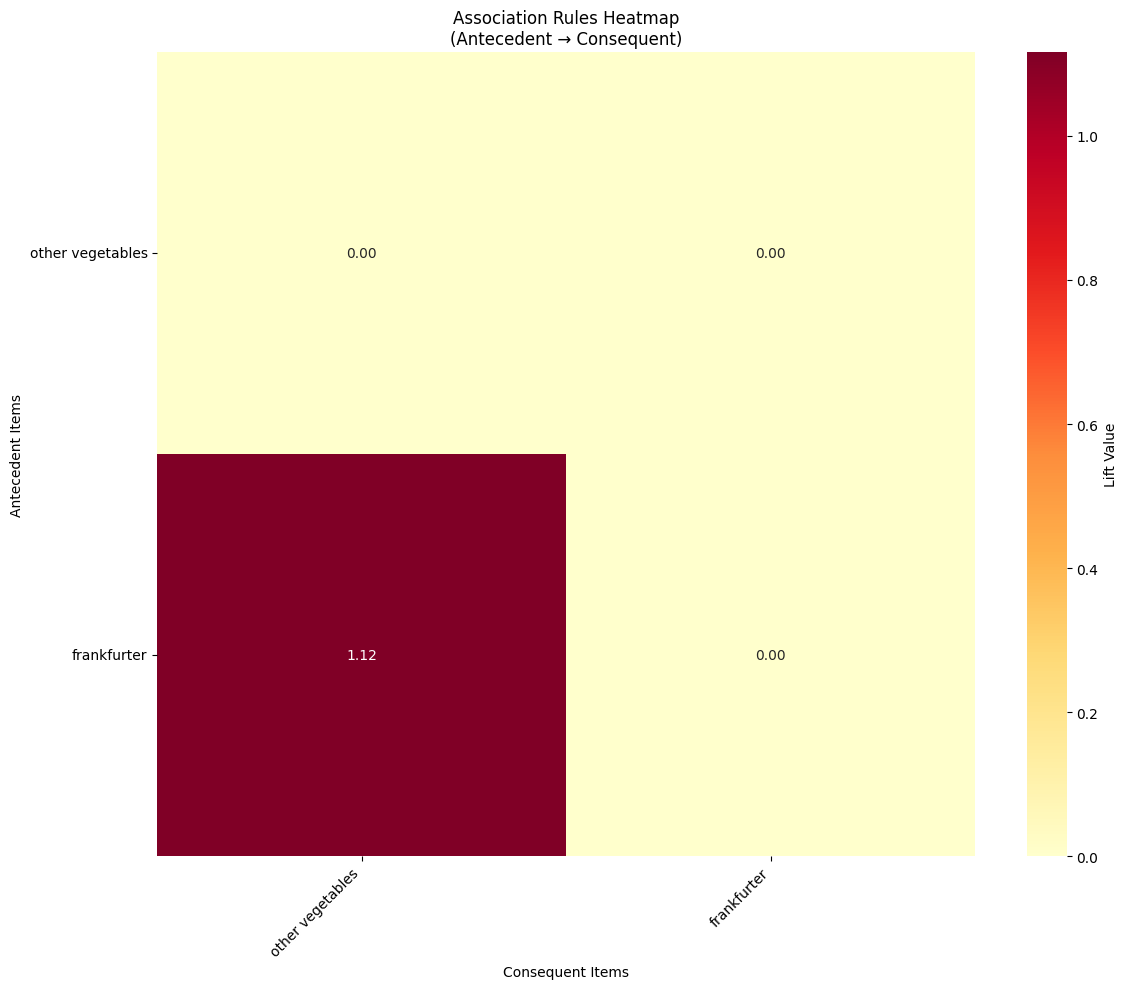

In [20]:
# Heatmap untuk melihat pola association
def create_association_heatmap(rules_df, top_n=20):
    if len(rules_df) == 0:
        print("No rules to visualize")
        return

    # Ambil top items yang sering muncul di rules
    all_items = set()
    for idx, rule in rules_df.iterrows():
        all_items.update(rule['antecedents'])
        all_items.update(rule['consequents'])

    top_items = list(all_items)[:top_n]

    # Create matrix
    matrix = np.zeros((len(top_items), len(top_items)))

    for idx, rule in rules_df.iterrows():
        ant_items = list(rule['antecedents'])
        cons_items = list(rule['consequents'])

        for ant in ant_items:
            for cons in cons_items:
                if ant in top_items and cons in top_items:
                    ant_idx = top_items.index(ant)
                    cons_idx = top_items.index(cons)
                    matrix[ant_idx][cons_idx] = rule['lift']

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix,
                xticklabels=top_items,
                yticklabels=top_items,
                annot=True,
                fmt='.2f',
                cmap='YlOrRd',
                cbar_kws={'label': 'Lift Value'})
    plt.title('Association Rules Heatmap\n(Antecedent → Consequent)')
    plt.xlabel('Consequent Items')
    plt.ylabel('Antecedent Items')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Execute jika ada rules
if 'rules_final' in locals() and len(rules_final) > 0:
    create_association_heatmap(rules_final)

In [21]:
# Estimasi dampak financial dari rules
print("💰 REVENUE IMPACT ANALYSIS")
print("=" * 30)

def calculate_revenue_impact(rules_df, avg_item_price=5):
    """Estimasi revenue impact dari implementing association rules"""

    total_impact = 0

    print("Revenue Impact per Rule:")
    print("-" * 40)

    for idx, rule in rules_df.iterrows():
        # Estimasi jumlah transaksi yang akan affected
        antecedent_transactions = int(rule['antecedent support'] * len(transactions))

        # Current consequent purchases from antecedent buyers
        current_consequent = int(rule['support'] * len(transactions))

        # Potential additional sales jika implement cross-selling
        # Asumsi: bisa increase consequent sales by 20% dari current confidence
        potential_increase = int(antecedent_transactions * rule['confidence'] * 0.2)

        # Revenue impact
        revenue_impact = potential_increase * avg_item_price
        total_impact += revenue_impact

        ant = ', '.join(list(rule['antecedents']))
        cons = ', '.join(list(rule['consequents']))

        print(f"Rule: {ant} → {cons}")
        print(f"  Current affected transactions: {antecedent_transactions}")
        print(f"  Potential additional sales: {potential_increase} units")
        print(f"  Estimated revenue impact: ${revenue_impact:,.2f}")
        print()

    print(f"🎯 TOTAL ESTIMATED ANNUAL REVENUE IMPACT: ${total_impact:,.2f}")
    print(f"📊 Average impact per rule: ${total_impact/len(rules_df):,.2f}")

    return total_impact

# Calculate impact jika ada rules
if 'rules_final' in locals() and len(rules_final) > 0:
    total_revenue_impact = calculate_revenue_impact(rules_final)

💰 REVENUE IMPACT ANALYSIS
Revenue Impact per Rule:
----------------------------------------
Rule: frankfurter → other vegetables
  Current affected transactions: 565
  Potential additional sales: 15 units
  Estimated revenue impact: $75.00

🎯 TOTAL ESTIMATED ANNUAL REVENUE IMPACT: $75.00
📊 Average impact per rule: $75.00


In [22]:
# Group items by categories untuk deeper insights
print("🏷️ ITEM CATEGORY ANALYSIS")
print("=" * 28)

# Define categories (bisa disesuaikan)
categories = {
    'Dairy': ['whole milk', 'yogurt', 'butter', 'cream cheese', 'milk'],
    'Vegetables': ['other vegetables', 'root vegetables', 'onions', 'carrots'],
    'Fruits': ['tropical fruit', 'citrus fruit', 'bananas', 'apples'],
    'Meat': ['sausage', 'frankfurter', 'beef', 'chicken', 'pork'],
    'Beverages': ['soda', 'bottled water', 'coffee', 'tea'],
    'Bakery': ['rolls/buns', 'bread', 'pastry'],
    'Snacks': ['chocolate', 'candy', 'cookies']
}

def categorize_item(item):
    for category, items in categories.items():
        if any(cat_item in item.lower() for cat_item in items):
            return category
    return 'Other'

# Apply categorization
df['category'] = df['itemDescription'].apply(categorize_item)

# Category analysis
category_stats = df.groupby('category').agg({
    'itemDescription': 'count',
    'Member_number': 'nunique'
}).rename(columns={
    'itemDescription': 'total_purchases',
    'Member_number': 'unique_customers'
})

category_stats['avg_purchases_per_customer'] = category_stats['total_purchases'] / category_stats['unique_customers']

print("Category Performance:")
print(category_stats.sort_values('total_purchases', ascending=False))

# Cross-category analysis
print("\n📊 CROSS-CATEGORY PURCHASE PATTERNS")
category_basket = df.groupby('Transaction_ID')['category'].apply(list).tolist()

# Count cross-category combinations
from collections import Counter
category_combinations = []
for basket in category_basket:
    if len(set(basket)) > 1:  # Multiple categories in same transaction
        sorted_cats = sorted(set(basket))
        for i in range(len(sorted_cats)):
            for j in range(i+1, len(sorted_cats)):
                category_combinations.append(f"{sorted_cats[i]} + {sorted_cats[j]}")

cross_category_freq = Counter(category_combinations)
print("Top cross-category combinations:")
for combo, freq in cross_category_freq.most_common(10):
    print(f"  {combo}: {freq} transactions")

🏷️ ITEM CATEGORY ANALYSIS
Category Performance:
            total_purchases  unique_customers  avg_purchases_per_customer
category                                                                 
Other                 17722              3750                    4.725867
Dairy                  5412              2737                    1.977347
Bakery                 3576              2228                    1.605027
Vegetables             3274              2125                    1.540706
Meat                   3035              2031                    1.494338
Beverages              3011              2009                    1.498756
Fruits                 1844              1453                    1.269098
Snacks                  891               784                    1.136480

📊 CROSS-CATEGORY PURCHASE PATTERNS
Top cross-category combinations:
  Dairy + Other: 3016 transactions
  Bakery + Other: 2137 transactions
  Other + Vegetables: 1917 transactions
  Meat + Other: 1831 transaction

In [23]:
# Bandingkan dengan random co-occurrence
print("🎲 COMPARISON WITH RANDOM BASELINE")
print("=" * 37)

def calculate_random_baseline(df_encoded, rules_df):
    """Compare actual rules dengan random co-occurrence"""

    item_probs = df_encoded.mean()  # Individual item probabilities

    print("Actual vs Random Comparison:")
    print("-" * 50)

    for idx, rule in rules_df.iterrows():
        ant = list(rule['antecedents'])[0]
        cons = list(rule['consequents'])[0]

        # Random probability (independent assumption)
        random_prob = item_probs[ant] * item_probs[cons]
        actual_prob = rule['support']

        # How much better than random
        improvement_factor = actual_prob / random_prob if random_prob > 0 else 0

        print(f"Rule: {ant} → {cons}")
        print(f"  Actual co-occurrence: {actual_prob:.4f}")
        print(f"  Random expectation: {random_prob:.4f}")
        print(f"  Improvement factor: {improvement_factor:.2f}x")
        print(f"  Lift (sanity check): {rule['lift']:.2f}")
        print()

if 'rules_final' in locals() and len(rules_final) > 0:
    calculate_random_baseline(df_encoded, rules_final)

🎲 COMPARISON WITH RANDOM BASELINE
Actual vs Random Comparison:
--------------------------------------------------
Rule: frankfurter → other vegetables
  Actual co-occurrence: 0.0051
  Random expectation: 0.0046
  Improvement factor: 1.12x
  Lift (sanity check): 1.12



In [24]:
# Mock-up dashboard metrics
print("📱 PROPOSED DASHBOARD METRICS")
print("=" * 32)

dashboard_metrics = {
    'Real-time Metrics': [
        'Live Association Strength Score',
        'Cross-selling Success Rate',
        'Category Combination Trends',
        'Customer Segment Behavior'
    ],
    'Business KPIs': [
        'Average Basket Size Increase',
        'Revenue from Recommendations',
        'Customer Lifetime Value',
        'Inventory Turnover Rate'
    ],
    'Operational Metrics': [
        'Product Placement Efficiency',
        'Stock-out Prevention Score',
        'Seasonal Trend Alerts',
        'Promotion Effectiveness'
    ]
}

for section, metrics in dashboard_metrics.items():
    print(f"\n📊 {section}:")
    for metric in metrics:
        print(f"   • {metric}")

📱 PROPOSED DASHBOARD METRICS

📊 Real-time Metrics:
   • Live Association Strength Score
   • Cross-selling Success Rate
   • Category Combination Trends
   • Customer Segment Behavior

📊 Business KPIs:
   • Average Basket Size Increase
   • Revenue from Recommendations
   • Customer Lifetime Value
   • Inventory Turnover Rate

📊 Operational Metrics:
   • Product Placement Efficiency
   • Stock-out Prevention Score
   • Seasonal Trend Alerts
   • Promotion Effectiveness


In [25]:
# Cell: Analisis TOP ASSOCIATION RULES yang lebih comprehensive
print("🏆 TOP ASSOCIATION RULES ANALYSIS")
print("=" * 35)

def analyze_top_rules(rules_df, top_n=5):
    """Analisis top rules berdasarkan berbagai metrics"""

    if len(rules_df) == 0:
        print("❌ No rules found to analyze")
        return

    print(f"📋 TOTAL RULES FOUND: {len(rules_df)}")
    print("=" * 40)

    # TOP by LIFT (strongest association)
    print(f"\n🚀 TOP {top_n} BY LIFT (Strongest Association):")
    print("-" * 50)
    top_lift = rules_df.nlargest(top_n, 'lift')

    for i, (idx, rule) in enumerate(top_lift.iterrows(), 1):
        ant = ', '.join(list(rule['antecedents']))
        cons = ', '.join(list(rule['consequents']))

        support_count = int(rule['support'] * len(transactions))
        ant_count = int(rule['antecedent support'] * len(transactions))

        print(f"#{i}. {ant} → {cons}")
        print(f"    📊 Support: {rule['support']:.3f} ({support_count} transactions)")
        print(f"    🎯 Confidence: {rule['confidence']:.1%}")
        print(f"    🚀 Lift: {rule['lift']:.2f}")
        print(f"    💡 Insight: Dari {ant_count} orang yang beli '{ant}',")
        print(f"        {support_count} orang ({rule['confidence']:.1%}) juga beli '{cons}'")
        print(f"        Ini {rule['lift']:.1f}x lebih tinggi dari random!")
        print()

    # TOP by CONFIDENCE (highest probability)
    print(f"\n🎯 TOP {top_n} BY CONFIDENCE (Highest Probability):")
    print("-" * 55)
    top_conf = rules_df.nlargest(top_n, 'confidence')

    for i, (idx, rule) in enumerate(top_conf.iterrows(), 1):
        ant = ', '.join(list(rule['antecedents']))
        cons = ', '.join(list(rule['consequents']))
        print(f"#{i}. {ant} → {cons}")
        print(f"    Confidence: {rule['confidence']:.1%}, Lift: {rule['lift']:.2f}")

    # TOP by SUPPORT (most frequent)
    print(f"\n📈 TOP {top_n} BY SUPPORT (Most Frequent):")
    print("-" * 45)
    top_support = rules_df.nlargest(top_n, 'support')

    for i, (idx, rule) in enumerate(top_support.iterrows(), 1):
        ant = ', '.join(list(rule['antecedents']))
        cons = ', '.join(list(rule['consequents']))
        support_count = int(rule['support'] * len(transactions))
        print(f"#{i}. {ant} → {cons}")
        print(f"    Support: {rule['support']:.3f} ({support_count} transactions)")

    return top_lift, top_conf, top_support

# Jalankan analisis untuk rules yang sudah ada
if 'rules_final' in locals() and len(rules_final) > 0:
    print("🔍 ANALYZING CURRENT RULES:")
    top_lift_rules, top_conf_rules, top_support_rules = analyze_top_rules(rules_final, top_n=5)
else:
    print("❌ No rules available. Need to run Apriori first.")

🏆 TOP ASSOCIATION RULES ANALYSIS
🔍 ANALYZING CURRENT RULES:
📋 TOTAL RULES FOUND: 1

🚀 TOP 5 BY LIFT (Strongest Association):
--------------------------------------------------
#1. frankfurter → other vegetables
    📊 Support: 0.005 (77 transactions)
    🎯 Confidence: 13.6%
    🚀 Lift: 1.12
    💡 Insight: Dari 565 orang yang beli 'frankfurter',
        77 orang (13.6%) juga beli 'other vegetables'
        Ini 1.1x lebih tinggi dari random!


🎯 TOP 5 BY CONFIDENCE (Highest Probability):
-------------------------------------------------------
#1. frankfurter → other vegetables
    Confidence: 13.6%, Lift: 1.12

📈 TOP 5 BY SUPPORT (Most Frequent):
---------------------------------------------
#1. frankfurter → other vegetables
    Support: 0.005 (77 transactions)


In [26]:
# Cell: MONTHLY/SEASONAL ASSOCIATION RULES
print("\n📅 MONTHLY & SEASONAL ASSOCIATION ANALYSIS")
print("=" * 45)

def monthly_association_analysis(df, target_months=None, min_support=0.01):
    """Analisis association rules per bulan atau seasonal"""

    # Add month column if not exists
    if 'month' not in df.columns:
        df['month'] = df['Date'].dt.month

    # Define seasons
    seasons = {
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11],
        'Winter': [12, 1, 2]
    }

    def get_season(month):
        for season, months in seasons.items():
            if month in months:
                return season
        return 'Unknown'

    df['season'] = df['month'].apply(get_season)

    # If no specific months, analyze all
    if target_months is None:
        target_months = sorted(df['month'].unique())

    monthly_results = {}
    seasonal_results = {}

    # MONTHLY ANALYSIS
    print("🗓️ MONTHLY ANALYSIS:")
    print("=" * 20)

    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

    for month in target_months:
        print(f"\n📅 Analyzing {month_names[month]} (Month {month}):")

        # Filter data untuk bulan tertentu
        month_df = df[df['month'] == month]

        if len(month_df) < 100:
            print(f"   ⚠️ Too few transactions ({len(month_df)}), skipping...")
            continue

        print(f"   📊 Transactions in {month_names[month]}: {len(month_df)}")

        # Create market basket untuk bulan ini
        month_baskets = month_df.groupby('Transaction_ID')['itemDescription'].apply(list).tolist()

        if len(month_baskets) < 50:
            print(f"   ⚠️ Too few unique transactions ({len(month_baskets)}), skipping...")
            continue

        try:
            # Encode
            te_month = TransactionEncoder()
            te_array_month = te_month.fit(month_baskets).transform(month_baskets)
            df_encoded_month = pd.DataFrame(te_array_month, columns=te_month.columns_)

            # Apriori dengan support lebih rendah untuk data yang lebih sedikit
            month_support = max(min_support, 3/len(month_baskets))  # At least 3 occurrences

            freq_items_month = apriori(df_encoded_month, min_support=month_support,
                                     use_colnames=True, verbose=0)

            if len(freq_items_month) == 0:
                print(f"   ❌ No frequent itemsets found")
                continue

            # Generate rules
            rules_month = association_rules(freq_items_month, metric="confidence",
                                          min_threshold=0.1)
            rules_month = rules_month[rules_month['lift'] > 1.0]

            if len(rules_month) > 0:
                monthly_results[month] = rules_month
                print(f"   ✅ Found {len(rules_month)} association rules!")

                # Show top rule untuk bulan ini
                top_rule = rules_month.loc[rules_month['lift'].idxmax()]
                ant = ', '.join(list(top_rule['antecedents']))
                cons = ', '.join(list(top_rule['consequents']))

                print(f"   🏆 Best rule: {ant} → {cons}")
                print(f"       Confidence: {top_rule['confidence']:.1%}, Lift: {top_rule['lift']:.2f}")

                # Show all rules untuk bulan ini
                print(f"   📋 All rules for {month_names[month]}:")
                for idx, rule in rules_month.nlargest(3, 'lift').iterrows():
                    ant = ', '.join(list(rule['antecedents']))
                    cons = ', '.join(list(rule['consequents']))
                    print(f"      • {ant} → {cons} (Conf: {rule['confidence']:.1%}, Lift: {rule['lift']:.2f})")
            else:
                print(f"   ❌ No meaningful association rules found")

        except Exception as e:
            print(f"   ❌ Error analyzing {month_names[month]}: {str(e)}")

    # SEASONAL ANALYSIS
    print(f"\n🌍 SEASONAL ANALYSIS:")
    print("=" * 20)

    for season, months in seasons.items():
        print(f"\n🌱 Analyzing {season}:")

        # Filter data untuk season
        season_df = df[df['season'] == season]

        if len(season_df) < 200:
            print(f"   ⚠️ Too few transactions ({len(season_df)}), skipping...")
            continue

        print(f"   📊 Transactions in {season}: {len(season_df)}")

        # Create market basket untuk season ini
        season_baskets = season_df.groupby('Transaction_ID')['itemDescription'].apply(list).tolist()

        try:
            # Encode
            te_season = TransactionEncoder()
            te_array_season = te_season.fit(season_baskets).transform(season_baskets)
            df_encoded_season = pd.DataFrame(te_array_season, columns=te_season.columns_)

            # Apriori
            season_support = max(min_support, 5/len(season_baskets))

            freq_items_season = apriori(df_encoded_season, min_support=season_support,
                                      use_colnames=True, verbose=0)

            if len(freq_items_season) > 0:
                # Generate rules
                rules_season = association_rules(freq_items_season, metric="confidence",
                                               min_threshold=0.1)
                rules_season = rules_season[rules_season['lift'] > 1.0]

                if len(rules_season) > 0:
                    seasonal_results[season] = rules_season
                    print(f"   ✅ Found {len(rules_season)} association rules!")

                    # Show top rules untuk season ini
                    print(f"   🏆 Top 3 rules for {season}:")
                    for i, (idx, rule) in enumerate(rules_season.nlargest(3, 'lift').iterrows(), 1):
                        ant = ', '.join(list(rule['antecedents']))
                        cons = ', '.join(list(rule['consequents']))
                        print(f"      {i}. {ant} → {cons}")
                        print(f"         Confidence: {rule['confidence']:.1%}, Lift: {rule['lift']:.2f}")
                else:
                    print(f"   ❌ No meaningful association rules found")
            else:
                print(f"   ❌ No frequent itemsets found")

        except Exception as e:
            print(f"   ❌ Error analyzing {season}: {str(e)}")

    return monthly_results, seasonal_results

# Jalankan analisis temporal
monthly_rules, seasonal_rules = monthly_association_analysis(df, min_support=0.005)


📅 MONTHLY & SEASONAL ASSOCIATION ANALYSIS
🗓️ MONTHLY ANALYSIS:

📅 Analyzing Jan (Month 1):
   📊 Transactions in Jan: 3333
   ✅ Found 28 association rules!
   🏆 Best rule: butter → root vegetables
       Confidence: 20.9%, Lift: 2.84
   📋 All rules for Jan:
      • butter → root vegetables (Conf: 20.9%, Lift: 2.84)
      • citrus fruit → whipped/sour cream (Conf: 11.3%, Lift: 2.56)
      • whipped/sour cream → citrus fruit (Conf: 12.3%, Lift: 2.56)

📅 Analyzing Feb (Month 2):
   📊 Transactions in Feb: 3032
   ✅ Found 28 association rules!
   🏆 Best rule: chocolate → bottled water
       Confidence: 20.7%, Lift: 3.29
   📋 All rules for Feb:
      • chocolate → bottled water (Conf: 20.7%, Lift: 3.29)
      • frozen vegetables → root vegetables (Conf: 18.4%, Lift: 2.71)
      • chicken → whole milk (Conf: 34.6%, Lift: 2.56)

📅 Analyzing Mar (Month 3):
   📊 Transactions in Mar: 3283
   ✅ Found 27 association rules!
   🏆 Best rule: pastry → newspapers
       Confidence: 12.7%, Lift: 2.96
  

In [30]:
# Cell: DEEP DIVE SPECIFIC MONTH
print("\n🔍 DEEP DIVE: SPECIFIC MONTH ANALYSIS")
print("=" * 40)

def analyze_specific_month(df, target_month, month_name=None):
    """Deep analysis untuk bulan tertentu"""

    if month_name is None:
        month_names = {1:'January', 2:'February', 3:'March', 4:'April',
                      5:'May', 6:'June', 7:'July', 8:'August',
                      9:'September', 10:'October', 11:'November', 12:'December'}
        month_name = month_names.get(target_month, f"Month {target_month}")

    print(f"🗓️ ANALYZING {month_name.upper()} (Month {target_month})")
    print("=" * 50)

    # Filter data
    month_df = df[df['month'] == target_month]

    print(f"📊 {month_name} Statistics:")
    print(f"   Total item purchases: {len(month_df)}")
    print(f"   Unique customers: {month_df['Member_number'].nunique()}")
    print(f"   Unique transactions: {month_df['Transaction_ID'].nunique()}")
    print(f"   Unique items: {month_df['itemDescription'].nunique()}")

    # Top items di bulan ini
    month_top_items = month_df['itemDescription'].value_counts().head(10)
    print(f"\n🏆 Top 10 items in {month_name}:")
    for i, (item, count) in enumerate(month_top_items.items(), 1):
        percentage = (count / len(month_df)) * 100
        print(f"   {i:2d}. {item:25s} : {count:4d} ({percentage:.1f}%)")

    # Market basket analysis
    month_baskets = month_df.groupby('Transaction_ID')['itemDescription'].apply(list).tolist()

    # Transaction size analysis
    basket_sizes = [len(basket) for basket in month_baskets]
    print(f"\n📦 Transaction patterns in {month_name}:")
    print(f"   Average items per transaction: {np.mean(basket_sizes):.2f}")
    print(f"   Most items in single transaction: {max(basket_sizes)}")

    # Apriori analysis
    if len(month_baskets) >= 50:
        print(f"\n🔍 Association Rules for {month_name}:")

        try:
            # Encode
            te_specific = TransactionEncoder()
            te_array_specific = te_specific.fit(month_baskets).transform(month_baskets)
            df_encoded_specific = pd.DataFrame(te_array_specific, columns=te_specific.columns_)

            # Apriori dengan support adaptif
            adaptive_support = max(0.005, 3/len(month_baskets))
            print(f"   Using min_support: {adaptive_support:.3f}")

            freq_items_specific = apriori(df_encoded_specific, min_support=adaptive_support,
                                        use_colnames=True, verbose=0)

            if len(freq_items_specific) > 0:
                print(f"   ✅ Found {len(freq_items_specific)} frequent itemsets")

                # Generate rules
                rules_specific = association_rules(freq_items_specific, metric="confidence",
                                                 min_threshold=0.08)
                rules_specific = rules_specific[rules_specific['lift'] > 1.0]

                if len(rules_specific) > 0:
                    print(f"   🎉 Found {len(rules_specific)} association rules!")

                    print(f"\n🏆 TOP 5 ASSOCIATION RULES FOR {month_name.upper()}:")
                    print("=" * 60)

                    for i, (idx, rule) in enumerate(rules_specific.nlargest(5, 'lift').iterrows(), 1):
                        ant = ', '.join(list(rule['antecedents']))
                        cons = ', '.join(list(rule['consequents']))

                        support_count = int(rule['support'] * len(month_baskets))
                        ant_count = int(rule['antecedent support'] * len(month_baskets))

                        print(f"#{i}. {ant} → {cons}")
                        print(f"    📊 Support: {rule['support']:.3f} ({support_count} transactions)")
                        print(f"    🎯 Confidence: {rule['confidence']:.1%}")
                        print(f"    🚀 Lift: {rule['lift']:.2f}")
                        print(f"    💡 In {month_name}: Dari {ant_count} orang yang beli '{ant}',")
                        print(f"        {support_count} orang ({rule['confidence']:.1%}) juga beli '{cons}'")
                        print()

                    return rules_specific
                else:
                    print(f"   ❌ No meaningful association rules found for {month_name}")
            else:
                print(f"   ❌ No frequent itemsets found for {month_name}")

        except Exception as e:
            print(f"   ❌ Error analyzing {month_name}: {str(e)}")
    else:
        print(f"   ⚠️ Too few transactions ({len(month_baskets)}) for reliable analysis")

    return None

# Contoh: Analisis bulan Desember (holiday season)
december_rules = analyze_specific_month(df, 5, "May")

# Contoh: Analisis bulan Juli (summer)
july_rules = analyze_specific_month(df, 1, "January")


🔍 DEEP DIVE: SPECIFIC MONTH ANALYSIS
🗓️ ANALYZING MAY (Month 5)
📊 May Statistics:
   Total item purchases: 3335
   Unique customers: 1098
   Unique transactions: 1287
   Unique items: 150

🏆 Top 10 items in May:
    1. whole milk                :  218 (6.5%)
    2. other vegetables          :  145 (4.3%)
    3. rolls/buns                :  142 (4.3%)
    4. soda                      :  115 (3.4%)
    5. yogurt                    :  103 (3.1%)
    6. bottled water             :   95 (2.8%)
    7. sausage                   :   93 (2.8%)
    8. tropical fruit            :   90 (2.7%)
    9. root vegetables           :   89 (2.7%)
   10. canned beer               :   84 (2.5%)

📦 Transaction patterns in May:
   Average items per transaction: 2.59
   Most items in single transaction: 9

🔍 Association Rules for May:
   Using min_support: 0.005
   ✅ Found 136 frequent itemsets
   🎉 Found 32 association rules!

🏆 TOP 5 ASSOCIATION RULES FOR MAY:
#1. salty snack → rolls/buns
    📊 Support: 0.0


📊 TEMPORAL RULES COMPARISON VISUALIZATION


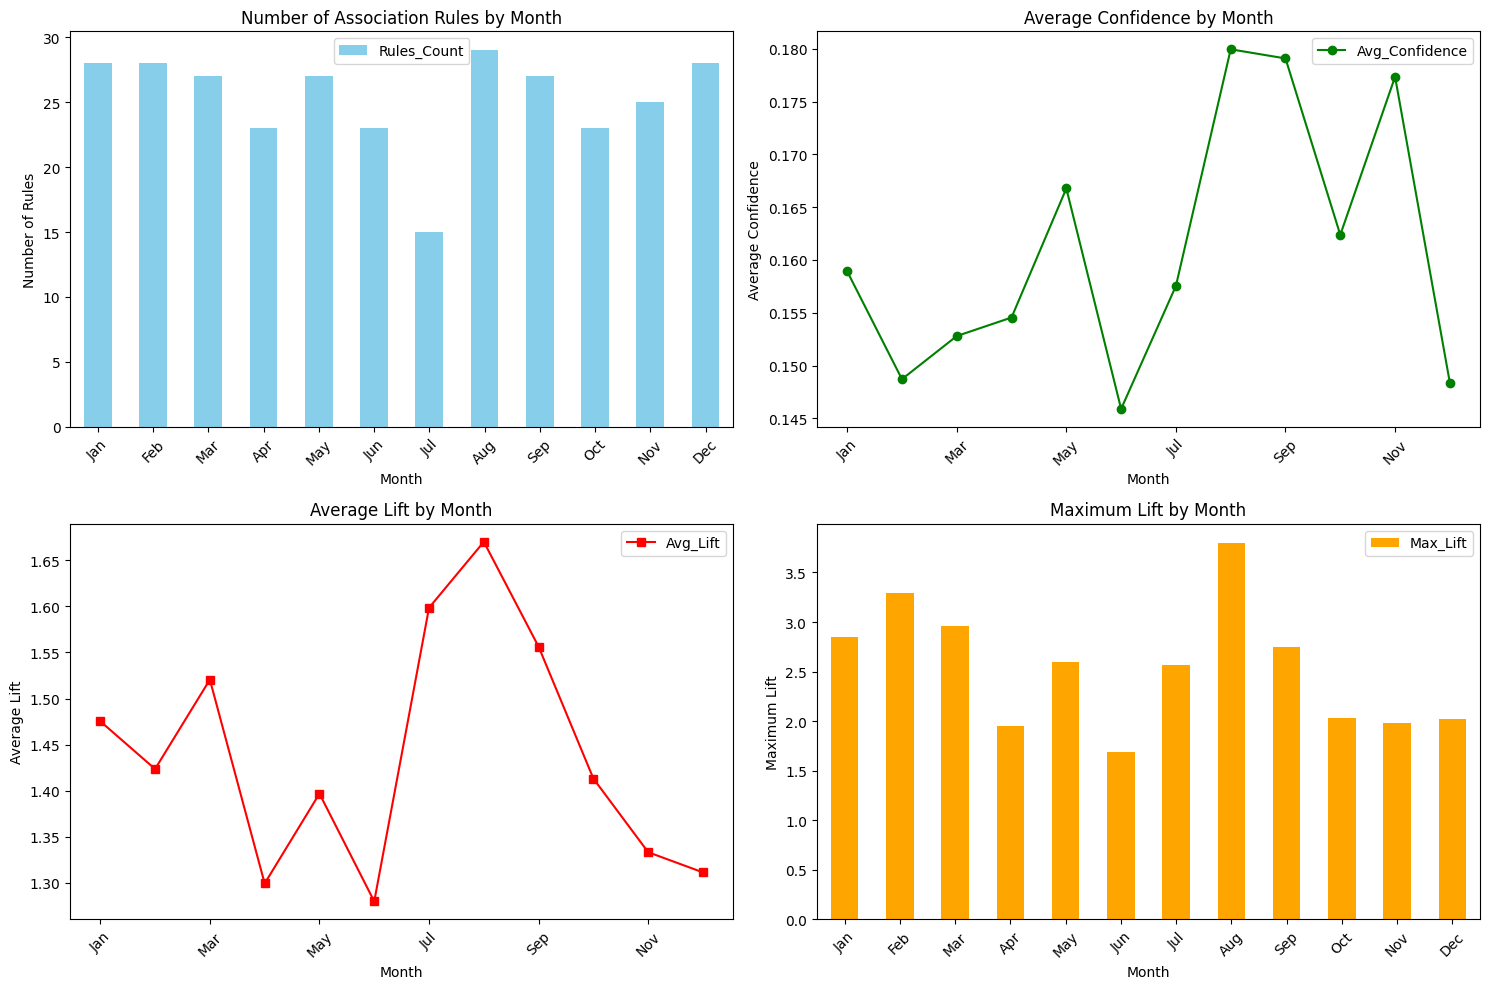

📈 Monthly Rules Summary:
Month  Rules_Count  Avg_Confidence  Avg_Lift  Max_Lift
  Jan           28        0.158923  1.475334  2.844308
  Feb           28        0.148704  1.423535  3.291034
  Mar           27        0.152791  1.520546  2.956574
  Apr           23        0.154546  1.299279  1.953488
  May           27        0.166773  1.396781  2.592518
  Jun           23        0.145888  1.279790  1.687584
  Jul           15        0.157537  1.598535  2.569697
  Aug           29        0.179950  1.670123  3.800428
  Sep           27        0.179087  1.556254  2.750000
  Oct           23        0.162376  1.413099  2.027534
  Nov           25        0.177350  1.333205  1.986121
  Dec           28        0.148362  1.311294  2.023649

🌍 Seasonal Rules Summary:
Season  Rules_Count  Avg_Confidence  Avg_Lift
Spring            9        0.134560  1.085916
Summer            3        0.143792  1.119501
  Fall           11        0.148019  1.151268
Winter            9        0.140968  1.060226


In [28]:
# Cell: VISUALISASI COMPARISON
print("\n📊 TEMPORAL RULES COMPARISON VISUALIZATION")
print("=" * 45)

def visualize_temporal_comparison(monthly_results, seasonal_results):
    """Visualisasi perbandingan rules antar bulan/season"""

    # Prepare data untuk visualization
    monthly_stats = []
    for month, rules in monthly_results.items():
        month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                      7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

        monthly_stats.append({
            'Month': month_names[month],
            'Rules_Count': len(rules),
            'Avg_Confidence': rules['confidence'].mean(),
            'Avg_Lift': rules['lift'].mean(),
            'Max_Lift': rules['lift'].max()
        })

    if monthly_stats:
        monthly_df = pd.DataFrame(monthly_stats)

        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # 1. Number of rules per month
        monthly_df.plot(x='Month', y='Rules_Count', kind='bar', ax=axes[0,0], color='skyblue')
        axes[0,0].set_title('Number of Association Rules by Month')
        axes[0,0].set_ylabel('Number of Rules')
        axes[0,0].tick_params(axis='x', rotation=45)

        # 2. Average confidence by month
        monthly_df.plot(x='Month', y='Avg_Confidence', kind='line', ax=axes[0,1],
                       marker='o', color='green')
        axes[0,1].set_title('Average Confidence by Month')
        axes[0,1].set_ylabel('Average Confidence')
        axes[0,1].tick_params(axis='x', rotation=45)

        # 3. Average lift by month
        monthly_df.plot(x='Month', y='Avg_Lift', kind='line', ax=axes[1,0],
                       marker='s', color='red')
        axes[1,0].set_title('Average Lift by Month')
        axes[1,0].set_ylabel('Average Lift')
        axes[1,0].tick_params(axis='x', rotation=45)

        # 4. Max lift by month
        monthly_df.plot(x='Month', y='Max_Lift', kind='bar', ax=axes[1,1], color='orange')
        axes[1,1].set_title('Maximum Lift by Month')
        axes[1,1].set_ylabel('Maximum Lift')
        axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        print("📈 Monthly Rules Summary:")
        print(monthly_df.to_string(index=False))

    # Seasonal comparison
    if seasonal_results:
        seasonal_stats = []
        for season, rules in seasonal_results.items():
            seasonal_stats.append({
                'Season': season,
                'Rules_Count': len(rules),
                'Avg_Confidence': rules['confidence'].mean(),
                'Avg_Lift': rules['lift'].mean()
            })

        seasonal_df = pd.DataFrame(seasonal_stats)

        print(f"\n🌍 Seasonal Rules Summary:")
        print(seasonal_df.to_string(index=False))

# Jalankan visualization
visualize_temporal_comparison(monthly_rules, seasonal_rules)

In [29]:
# Cell: SUMMARY INSIGHTS
print("\n💡 KEY TEMPORAL INSIGHTS SUMMARY")
print("=" * 35)

def generate_temporal_insights(monthly_results, seasonal_results):
    """Generate business insights dari temporal analysis"""

    print("🎯 KEY FINDINGS:")
    print("=" * 15)

    # Monthly insights
    if monthly_results:
        print(f"\n📅 MONTHLY PATTERNS:")

        total_monthly_rules = sum(len(rules) for rules in monthly_results.values())
        avg_rules_per_month = total_monthly_rules / len(monthly_results)

        print(f"   • Found rules in {len(monthly_results)} months")
        print(f"   • Average {avg_rules_per_month:.1f} rules per month")

        # Find best month
        best_month = max(monthly_results.keys(),
                        key=lambda m: len(monthly_results[m]))
        month_names = {1:'January', 2:'February', 3:'March', 4:'April',
                      5:'May', 6:'June', 7:'July', 8:'August',
                      9:'September', 10:'October', 11:'November', 12:'December'}

        print(f"   • Most associative month: {month_names[best_month]} ({len(monthly_results[best_month])} rules)")

        # Best rule overall
        all_monthly_rules = pd.concat(monthly_results.values(), ignore_index=True)
        best_rule = all_monthly_rules.loc[all_monthly_rules['lift'].idxmax()]
        ant = ', '.join(list(best_rule['antecedents']))
        cons = ', '.join(list(best_rule['consequents']))
        print(f"   • Strongest monthly rule: {ant} → {cons} (Lift: {best_rule['lift']:.2f})")

    # Seasonal insights
    if seasonal_results:
        print(f"\n🌍 SEASONAL PATTERNS:")

        total_seasonal_rules = sum(len(rules) for rules in seasonal_results.values())
        print(f"   • Found rules in {len(seasonal_results)} seasons")

        # Find best season
        best_season = max(seasonal_results.keys(),
                         key=lambda s: len(seasonal_results[s]))
        print(f"   • Most associative season: {best_season} ({len(seasonal_results[best_season])} rules)")

        # Best seasonal rule
        all_seasonal_rules = pd.concat(seasonal_results.values(), ignore_index=True)
        best_seasonal_rule = all_seasonal_rules.loc[all_seasonal_rules['lift'].idxmax()]
        ant = ', '.join(list(best_seasonal_rule['antecedents']))
        cons = ', '.join(list(best_seasonal_rule['consequents']))
        print(f"   • Strongest seasonal rule: {ant} → {cons} (Lift: {best_seasonal_rule['lift']:.2f})")

    print(f"\n🎯 BUSINESS IMPLICATIONS:")
    print(f"   • Seasonal promotions berdasarkan strongest rules per season")
    print(f"   • Monthly inventory planning berdasarkan associative patterns")
    print(f"   • Time-based cross-selling strategies")
    print(f"   • Holiday/seasonal bundling opportunities")

# Generate insights
generate_temporal_insights(monthly_rules, seasonal_rules)


💡 KEY TEMPORAL INSIGHTS SUMMARY
🎯 KEY FINDINGS:

📅 MONTHLY PATTERNS:
   • Found rules in 12 months
   • Average 25.2 rules per month
   • Most associative month: August (29 rules)
   • Strongest monthly rule: oil → soda (Lift: 3.80)

🌍 SEASONAL PATTERNS:
   • Found rules in 4 seasons
   • Most associative season: Fall (11 rules)
   • Strongest seasonal rule: frankfurter → other vegetables (Lift: 1.33)

🎯 BUSINESS IMPLICATIONS:
   • Seasonal promotions berdasarkan strongest rules per season
   • Monthly inventory planning berdasarkan associative patterns
   • Time-based cross-selling strategies
   • Holiday/seasonal bundling opportunities
